### Principal Component Analysis in Python  | How to Apply PCA | Scree Plot, Biplot, Elbow & Kaisers Rule

In [ ]:
# Install Libraries
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy

In [3]:
# Import Libraries and Modules
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load Breast Cancer Dataset
breast_cancer = load_breast_cancer()

In [5]:
# Data Elements of breast cancer
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
breast_cancer.data.shape

(569, 30)

In [7]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# Print Data in DataFrame format
DF = pd.DataFrame(data=breast_cancer.data[:, :10],  # Create DataFrame DF
                 columns = breast_cancer.feature_names[:10])

DF.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


In [10]:
# Standardize Data
scaler = StandardScaler()                # Create Scaler
data_scaled = scaler.fit_transform(DF)   # Fit scaler
print(data_scaled)                       # Print scaler

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00 ...  2.53247522e+00
   2.21751501e+00  2.25574689e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00 ...  5.48144156e-01
   1.39236330e-03 -8.68652457e-01]
 [ 1.57988811e+00  4.56186952e-01  1.56650313e+00 ...  2.03723076e+00
   9.39684817e-01 -3.98007910e-01]
 ...
 [ 7.02284249e-01  2.04557380e+00  6.72675785e-01 ...  1.05777359e-01
  -8.09117071e-01 -8.95586935e-01]
 [ 1.83834103e+00  2.33645719e+00  1.98252415e+00 ...  2.65886573e+00
   2.13719425e+00  1.04369542e+00]
 [-1.80840125e+00  1.22179204e+00 -1.81438851e+00 ... -1.26181958e+00
  -8.20069901e-01 -5.61032377e-01]]


In [11]:
# Print Standardized Data in DataFrame Format since the data_scaled is returned as a numpy array
DF_scaled = pd.DataFrame(data = data_scaled,                           # Create DataFrame DF_scaled
                         columns = breast_cancer.feature_names[:10])
DF_scaled.head(6)                                                      # Print first 6 rows of DF_scaled


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005


In [12]:
# Ideal Number of Components
pca = PCA(n_components = 10)                 # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(DF_scaled)     # Transform data
print(pca_trans)                             # Print transformed data
print(pca_trans.shape)                       # Print dimensions of transformed data

[[ 5.22415459e+00  3.20442816e+00 -2.17133953e+00 ... -2.31931776e-01
  -2.19820527e-02 -1.12576612e-02]
 [ 1.72809379e+00 -2.54083911e+00 -1.01967851e+00 ... -8.34286829e-03
  -5.61712691e-02 -2.29922105e-02]
 [ 3.96975705e+00 -5.50074878e-01 -3.23568755e-01 ... -3.55050077e-01
   2.01158676e-02 -2.26748120e-02]
 ...
 [ 6.49583280e-01 -2.04178350e+00  1.71096620e+00 ...  1.89068279e-02
  -4.71287912e-02  5.92649756e-04]
 [ 6.90566407e+00  1.21624274e+00  1.64012034e+00 ...  2.23487192e-01
   4.15622728e-03 -1.81335473e-02]
 [-3.97083348e+00 -9.89971170e-01  2.15827670e+00 ... -5.27613923e-01
   4.44687117e-01 -2.93250285e-02]]
(569, 10)


In [13]:
prop_var = pca.explained_variance_ratio_     # Extract proportion of explained variance
print(prop_var)                              # Print proportion of explained variance

[5.47858799e-01 2.51871359e-01 8.80615179e-02 4.99009436e-02
 3.72539190e-02 1.24141749e-02 8.00853104e-03 3.48897928e-03
 1.11354606e-03 2.82305888e-05]


In [14]:
PC_number = np.arange(pca.n_components_) + 1 # Enumarate component numbers
print(PC_number)                             # Print component numbers

[ 1  2  3  4  5  6  7  8  9 10]


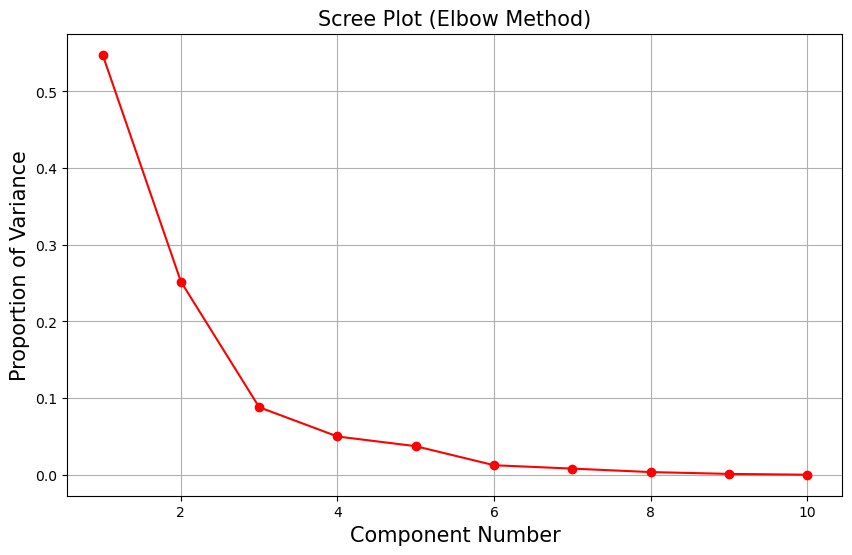

In [15]:
# Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         prop_var,
         'ro-')
plt.title('Scree Plot (Elbow Method)',      # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance',
           fontsize = 15)
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph